# Multi Axion System

In [79]:
canonical_names = [r"$\theta_1$", r"$\theta_2$", r"$\dot{\theta}_1$", r"$\dot{\theta}_2$"]
mass_states_names = [r"$\phi_1$", r"$\phi_2$", r"$\dot{\phi}_1$", r"$\dot{\phi}_2$"]

def plot_config_space(ts, theta1s, theta2s, phi1s, phi2s, skip_percent=0.0, interval=np.pi / 8):
    skip = (ts[-1] - ts[0]) * skip_percent
    s = skip_steps = int(np.ceil(skip / (ts[1] - ts[0])))

    def calc_range(x):
        return np.linspace(np.floor(np.min(x) / interval) * interval, np.ceil(np.max(x) / interval) * interval, 100)

    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    theta1_range, theta2_range = calc_range(theta1s[skip_steps:]), calc_range(theta2s[skip_steps:])
    V = np.array([[multi_axion_field.calc_V([t1, t2], Q, Lambda) for t1 in theta1_range] for t2 in theta2_range])
    plt.contour(theta1_range, theta2_range, V, levels=15, cmap="OrRd")
    plt.plot(theta1s[skip_steps:], theta2s[skip_steps:], color="black")
    plt.plot([theta1s[skip_steps]], [theta2s[skip_steps]], "ro")
    plt.xlabel(canonical_names[0])
    plt.ylabel(canonical_names[1])
    plt.colorbar(label=r"$V(\theta_1, \theta_2)$")
    plt.title("canonical basis")

    plt.subplot(1, 2, 2)
    phi1_range, phi2_range = calc_range(phi1s[skip_steps:]), calc_range(phi2s[skip_steps:])
    V = np.array([[multi_axion_field.calc_V(Q_inv @ [t1, t2], Q, Lambda) for t1 in phi1_range] for t2 in phi2_range])
    plt.contour(phi1_range, phi2_range, V, levels=15, cmap="OrRd")
    plt.plot(phi1s[skip_steps:], phi2s[skip_steps:], color="black")
    plt.plot([phi1s[skip_steps]], [phi2s[skip_steps]], "ro")
    plt.xlabel(mass_states_names[0])
    plt.ylabel(mass_states_names[1])
    plt.colorbar(label=r"$V(\phi_1, \phi_2)$")
    plt.title("mass eigen state basis")

    plt.tight_layout()
    #plt.savefig("config_space_trajectory_multi_axion.pdf")

array([0.0050404 , 0.15927677])

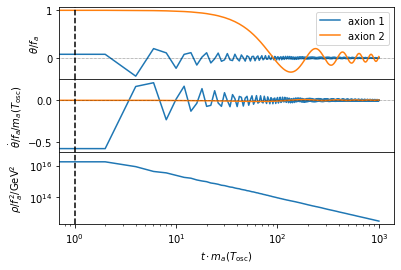

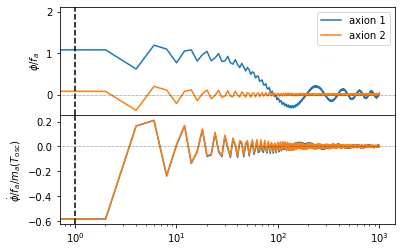

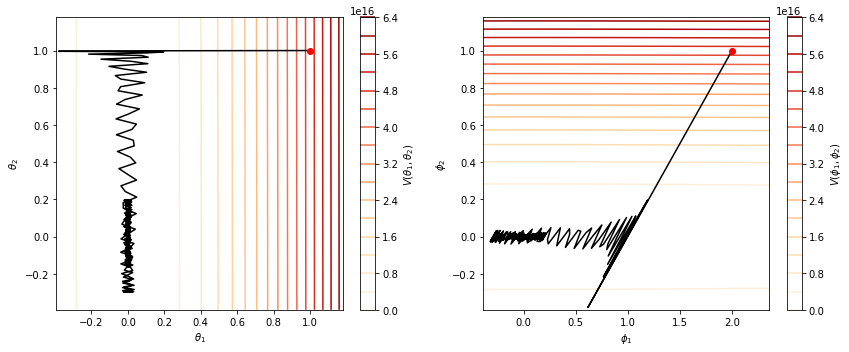

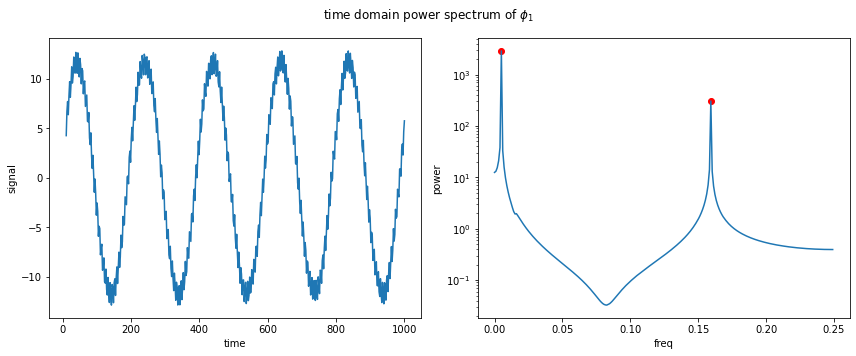

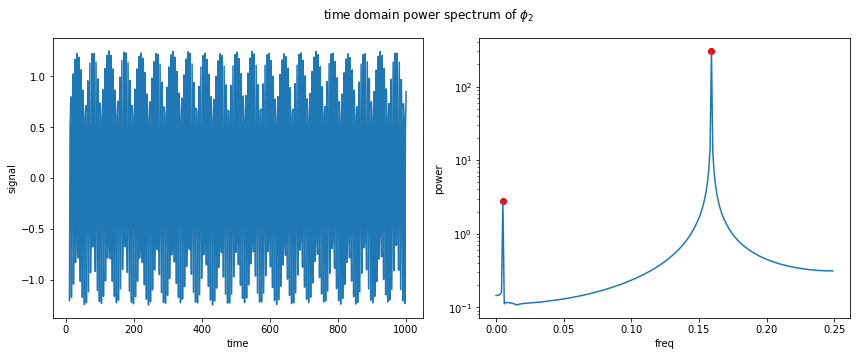

In [87]:
%run observables.py
%run multi_axion.py
%run analysis_tools.py

Q = np.array([[1,1], [1, 0]])
Q_inv = np.linalg.inv(Q)
Lambda = 1e7**2 * np.array([1, 1e3]) # [GeV^2]
thetas0 = [1, 1]
H_inf = Gamma_inf = 1e8
tmax_axion = 1e3

energy_scale, conv_factor, rho_R_init, rho_inf_init, scale, tmax_inf, red_chem_pots_init = \
    init_system(H_inf, Gamma_inf, (Q, Lambda), multi_axion_field, tmax_axion)
rh_sol, T_and_H_fn, T_and_H_and_T_dot_fn = decay_process.solve(tmax_inf, rho_R_init, rho_inf_init, scale, Gamma_inf)

axsol = multi_axion_field.solve(np.hstack([thetas0, np.zeros(len(Lambda))]), (Q, Lambda), tmax_axion, T_and_H_fn, Gamma_inf)

ts = np.linspace(0, axsol.t[-1], 500)
theta1s, theta2s, theta1_dots, theta2_dots = canoncial_states = axsol.sol(ts)
phi1s, phi2s, phi1_dots, phi2_dots = mass_states = multi_axion_field.calc_mass_state(canoncial_states, Q, Lambda)

plot_tools.plot_axion_field_evolution(multi_axion_field, (Q, Lambda), 1.0, 
    [axsol], show_steps=False, field_name="\\theta")
plot_tools.plot_axion_field_evolution(multi_axion_field, (Q, Lambda), 1.0, 
    [(ts, mass_states)], show_steps=False, field_name="\\phi", show_energy=False)
plot_config_space(ts, theta1s, theta2s, phi1s, phi2s)
analyse_power_spectrum(mass_states_names[0], ts, phi1s, canoncial_states, multi_axion_field, (Q, Lambda))
analyse_power_spectrum(mass_states_names[1], ts, phi2s, canoncial_states, multi_axion_field, (Q, Lambda))